# Predicting Traffic Volume Using Machine Learning: A Random Forest Approach

In [1]:
import pandas as pd
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

### Exploratory Data Analysis

Exploratory Data Analysis (EDA) is another important step in the data science process that involves investigating the data set to discover patterns, spot anomalies, test hypoteses, and check assumptions through summary statistics and graphical representations

####  Loading the Data

In [2]:
# Load the dataset for train and test data
df_train = pd.read_csv('Train.csv')
df_test = pd.read_csv('Test.csv')

In [3]:
# Display the first few rows of the train dataset
df_train.head()

,date_time,is_holiday,air_pollution_index,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,clouds_all,weather_type,weather_description,traffic_volume
0,2012-10-02 09:00:00,NaN,121,89,2,329,1,1,288.28,0.0,0.0,40,Clouds,scattered clouds,5545
1,2012-10-02 10:00:00,NaN,178,67,3,330,1,1,289.36,0.0,0.0,75,Clouds,broken clouds,4516
2,2012-10-02 11:00:00,NaN,113,66,3,329,2,2,289.58,0.0,0.0,90,Clouds,overcast clouds,4767
3,2012-10-02 12:00:00,NaN,20,66,3,329,5,5,290.13,0.0,0.0,90,Clouds,overcast clouds,5026
4,2012-10-02 13:00:00,NaN,281,65,3,329,7,7,291.14,0.0,0.0,75,Clouds,broken clouds,4918


In [4]:
# Display the first few row of the test dataset
df_test.head()

,date_time,is_holiday,air_pollution_index,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,clouds_all,weather_type,weather_description
0,2017-05-18 00:00:00,NaN,73,63,1,27,4,4,285.15,0.0,0,90,Rain,moderate rain
1,2017-05-18 00:00:00,NaN,251,63,1,27,4,4,285.15,0.0,0,90,Mist,mist
2,2017-05-18 00:00:00,NaN,75,56,1,0,1,1,285.15,0.0,0,90,Drizzle,light intensity drizzle
3,2017-05-18 01:00:00,NaN,98,56,1,351,2,2,284.79,0.0,0,90,Rain,heavy intensity rain
4,2017-05-18 01:00:00,NaN,283,56,1,351,1,1,284.79,0.0,0,90,Mist,mist


#### Basic Information About Dataset

The .info() function provides a concise summary of the DataFrame, including the number of non-null entries in each column, their data types, and memory usage.

The .describe() function generates summary statistics for the numerical columns, giving us insights into the central tendency, spread, and shape of the data distribution

In [5]:
# Display summary statistics for numerical columns
df_train.describe()

,air_pollution_index,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,clouds_all,traffic_volume
count,33750.000000,33750.000000,33750.000000,33750.000000,33750.000000,33750.000000,33750.000000,33750.000000,33750.000000,33750.000000,33750.000000
mean,154.841422,71.209007,3.378193,199.471852,4.989748,4.989748,280.069587,0.448739,0.000318,50.458785,3240.118163
std,83.735515,16.852248,2.055792,99.841088,2.570021,2.570021,13.415256,53.526500,0.009760,38.871734,1991.487289
min,10.000000,13.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,83.000000,60.000000,2.000000,130.000000,3.000000,3.000000,271.720000,0.000000,0.000000,1.000000,1165.250000
50%,155.000000,72.000000,3.000000,200.000000,5.000000,5.000000,280.150000,0.000000,0.000000,64.000000,3335.000000
75%,228.000000,85.000000,5.000000,290.000000,7.000000,7.000000,290.620000,0.000000,0.000000,90.000000,4926.000000
max,299.000000,100.000000,16.000000,360.000000,9.000000,9.000000,308.240000,9831.300000,0.510000,100.000000,7280.000000


In [6]:
# Display summary statistics for numerical columns
df_test.describe()

,air_pollution_index,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,clouds_all
count,14454.000000,14454.000000,14454.000000,14454.000000,14454.000000,14454.000000,14454.000000,14454.000000,14454.0,14454.000000
mean,154.679397,67.833887,3.607306,209.285319,5.005535,5.005535,283.859084,0.066965,0.0,46.801785
std,83.405392,21.147425,2.212177,94.996443,2.586276,2.586276,12.769255,0.466853,0.0,39.232165
min,10.000000,10.000000,0.000000,0.000000,1.000000,1.000000,246.150000,0.000000,0.0,0.000000
25%,83.000000,54.000000,2.000000,140.000000,3.000000,3.000000,273.720000,0.000000,0.0,1.000000
50%,155.000000,71.000000,3.000000,211.000000,5.000000,5.000000,287.725000,0.000000,0.0,40.000000
75%,227.000000,85.000000,5.000000,290.000000,7.000000,7.000000,293.860000,0.000000,0.0,90.000000
max,299.000000,100.000000,16.000000,360.000000,9.000000,9.000000,310.070000,10.600000,0.0,92.000000


In [7]:
# Display the summary information about the dataset
df_train.info()
print("-"*50)
df_test.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 33750 entries, 0 to 33749

Data columns (total 15 columns):

 #   Column               Non-Null Count  Dtype  

---  ------               --------------  -----  

 0   date_time            33750 non-null  object 

 1   is_holiday           43 non-null     object 

 2   air_pollution_index  33750 non-null  int64  

 3   humidity             33750 non-null  int64  

 4   wind_speed           33750 non-null  int64  

 5   wind_direction       33750 non-null  int64  

 6   visibility_in_miles  33750 non-null  int64  

 7   dew_point            33750 non-null  int64  

 8   temperature          33750 non-null  float64

 9   rain_p_h             33750 non-null  float64

 10  snow_p_h             33750 non-null  float64

 11  clouds_all           33750 non-null  int64  

 12  weather_type         33750 non-null  object 

 13  weather_description  33750 non-null  object 

 14  traffic_volume       33750 non-null  int64  

dtypes: float64(3), i

#### Checking for Missing Values

The code given below checks for missing values in each column.Identifying missing values early is crucial as they need to be handled before model training.

In [8]:
# Checking missing values for train data
missing_values_of_train_data = df_train.isnull().sum()
missing_values_of_train_data[missing_values_of_train_data > 0]

is_holiday    33707
dtype: int64

In [9]:
# Checking missing values for test data
missing_values_of_test_data = df_test.isnull().sum()
missing_values_of_test_data[missing_values_of_test_data > 0]

is_holiday    14436
dtype: int64

#### Distribution of Numerical Features

Histograms allo us to visualize the distribution of numerical values. This helps in understanding the distribution (e.g., normal,skewed) and identifying any potential outliers

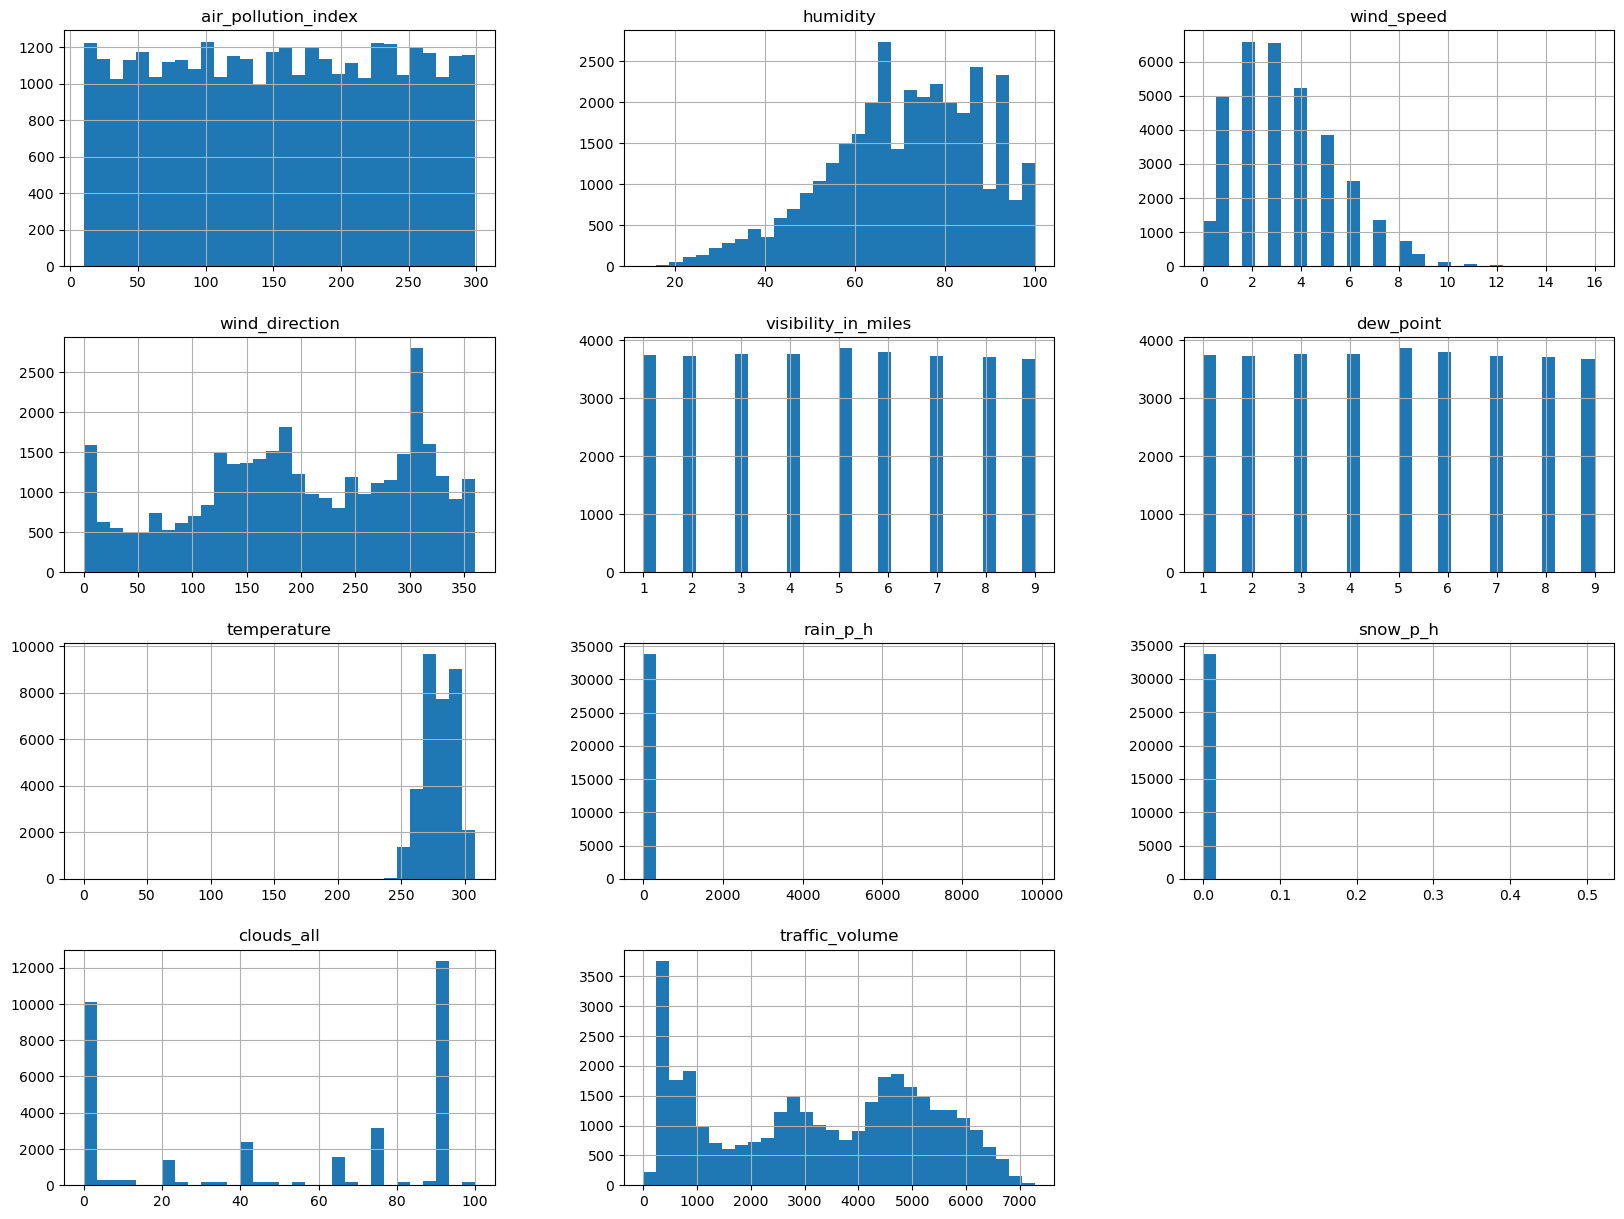

In [10]:
# Plot histograms for all numerical features in train data
df_train.hist(bins = 30,figsize = (20,15))
plt.show()

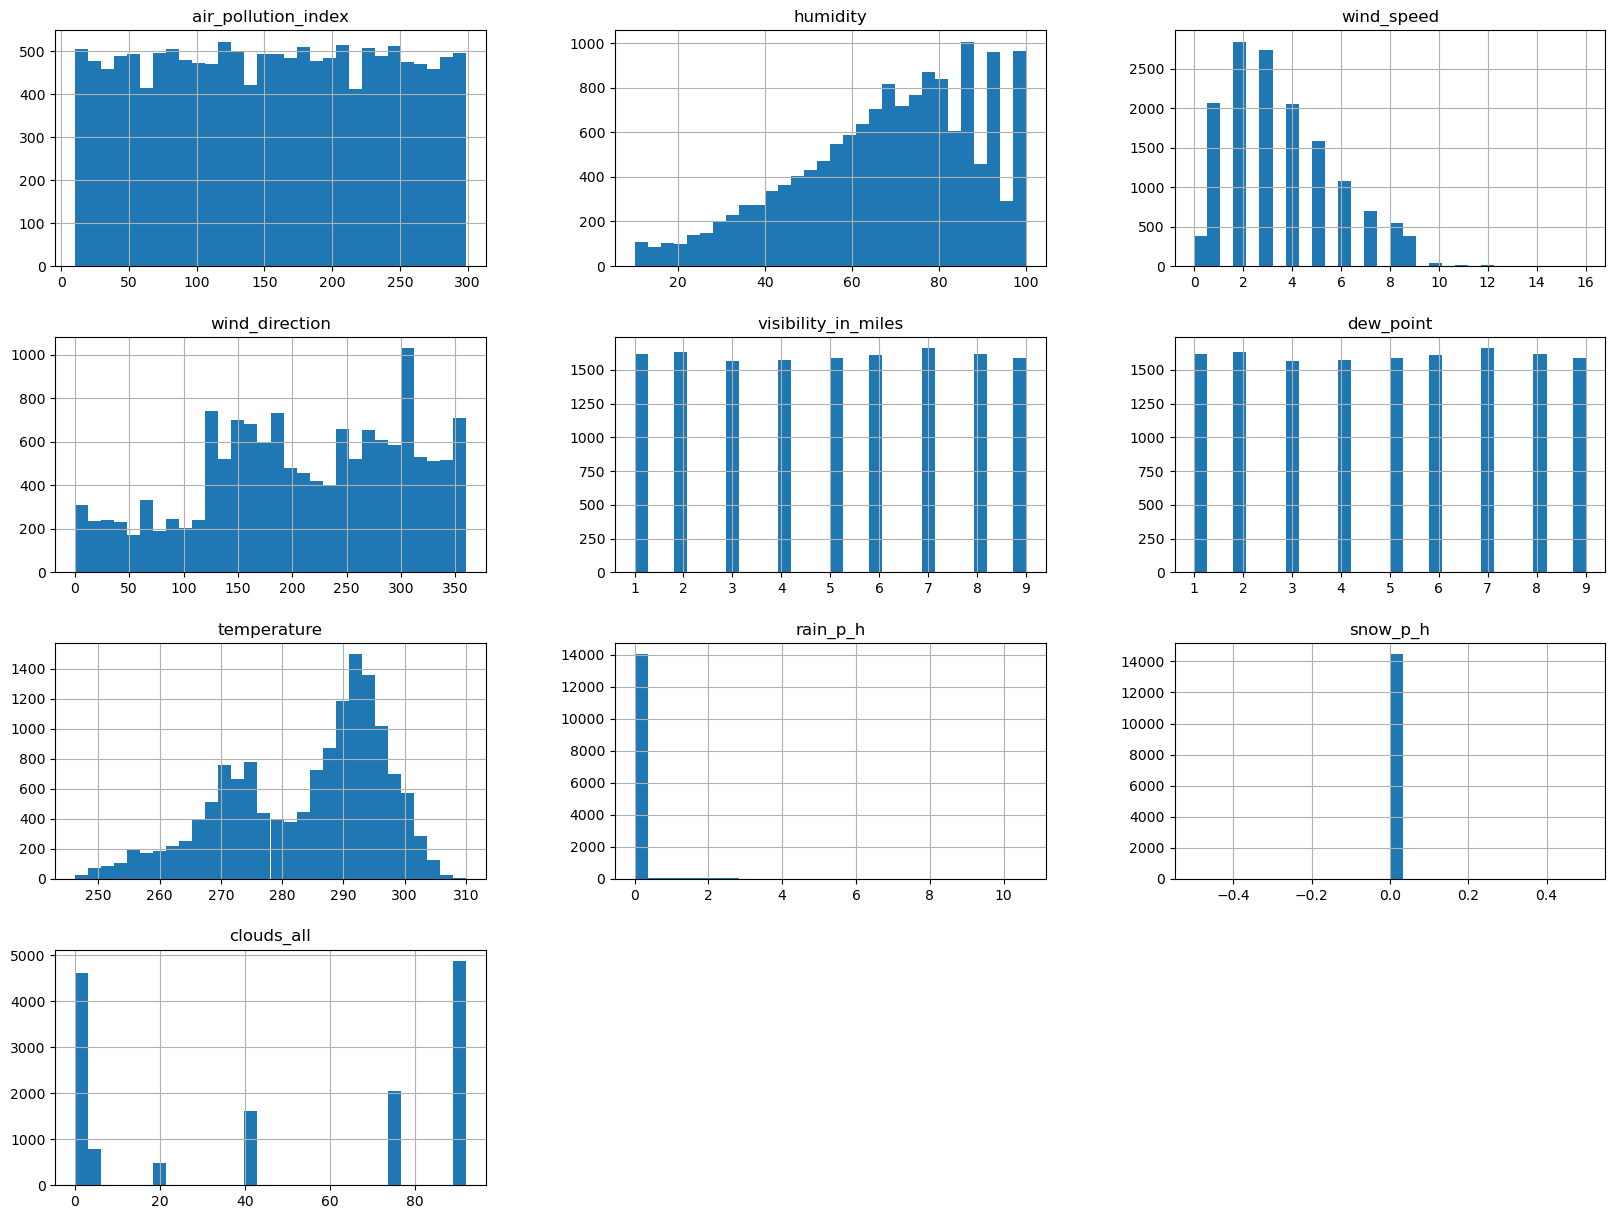

In [11]:
# Plot histograms for all numerical values in test data
df_test.hist(bins = 30,figsize = (20,15))
plt.show()

#### Analyzing Categorical Features

The count plots show the distribution of categorical features, allowing us to see the frequency of each category. This is useful for understanding the balance of categorical variables and spotting any imbalance.

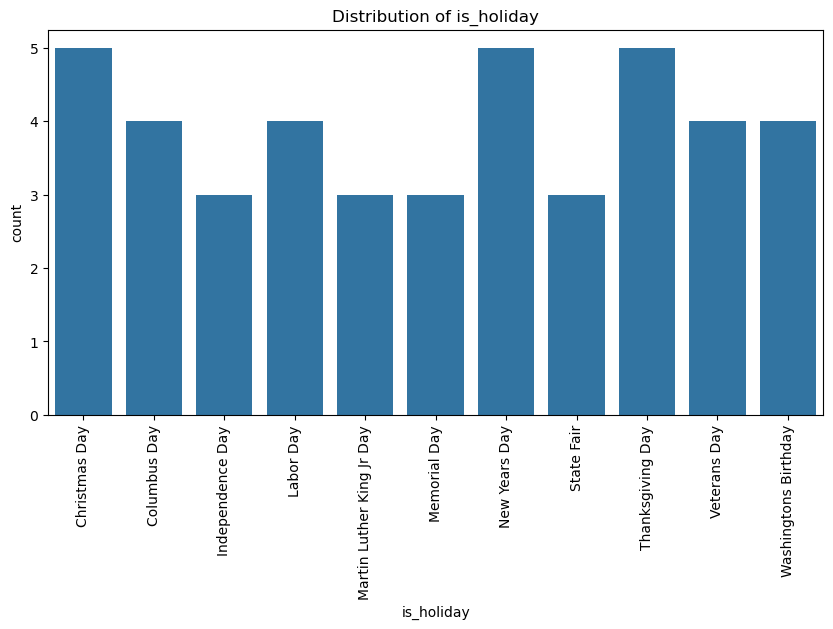

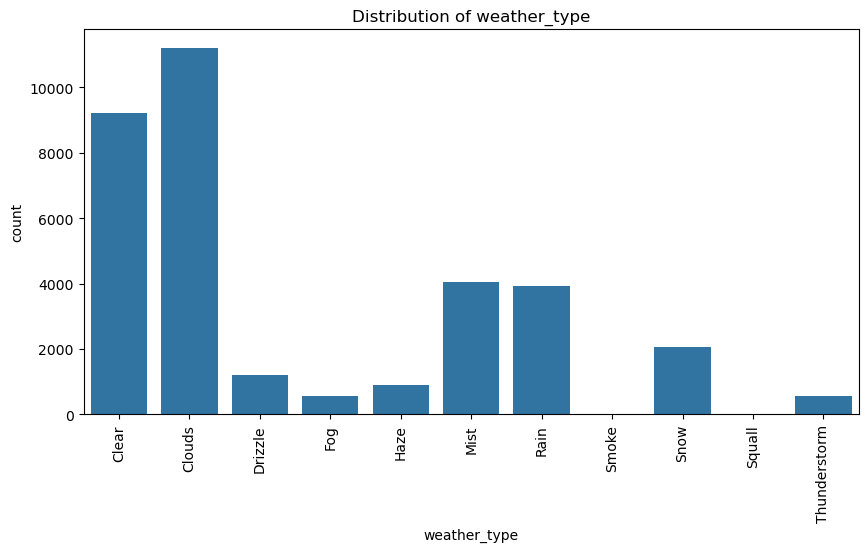

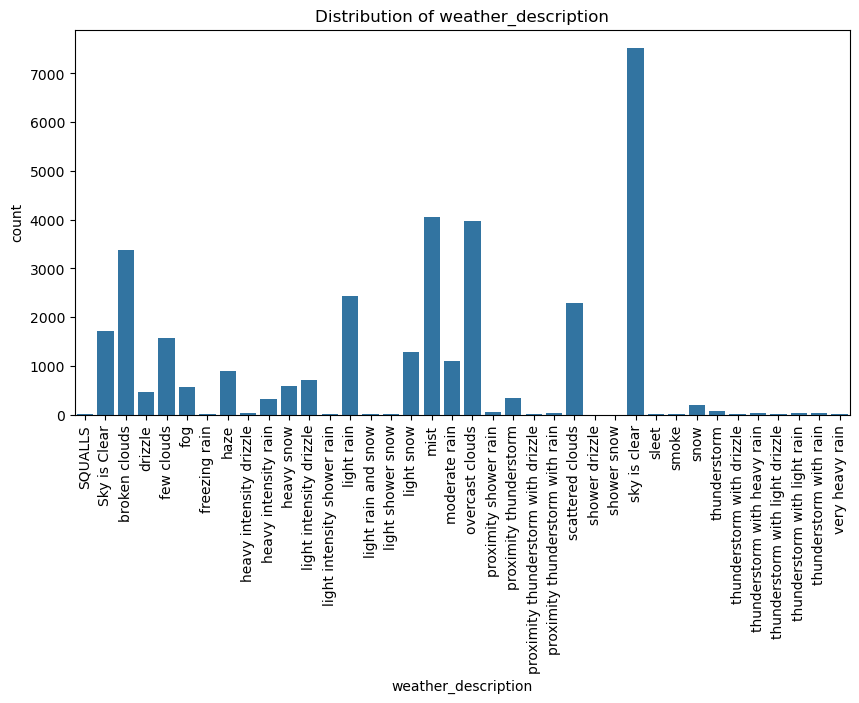

In [12]:
# Plotting the distribution of categorical features of train data
data = df_train.copy()
data['is_holiday'] = data['is_holiday'].astype('category')
data['weather_type'] = data['weather_type'].astype('category')
data['weather_description'] = data['weather_description'].astype('category')

# Plotting the distribution of categorical features
categorical_features = ['is_holiday', 'weather_type', 'weather_description']

for feature in categorical_features:
    plt.figure(figsize=(10, 5))
    sns.countplot(x=data[feature])
    plt.title(f'Distribution of {feature}')
    plt.xticks(rotation=90)
    plt.show()

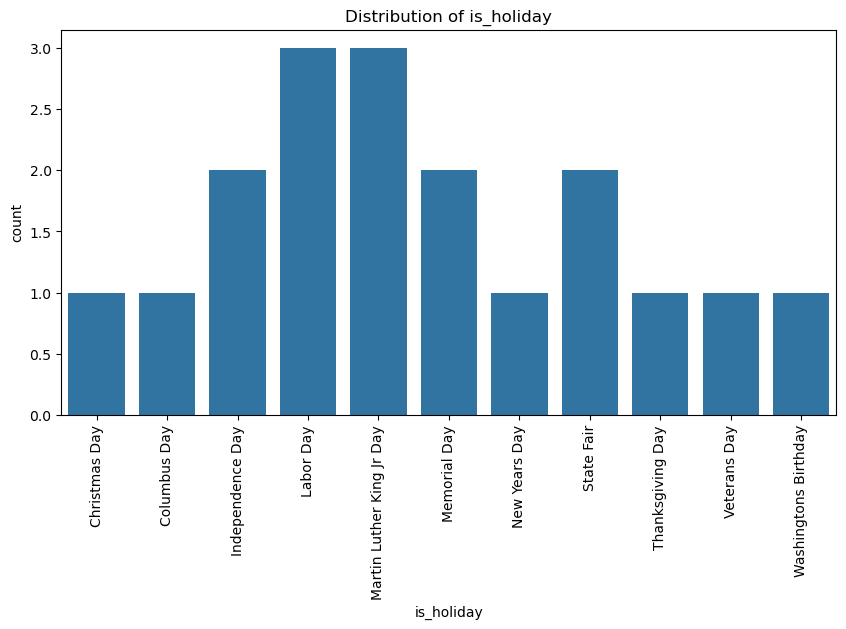

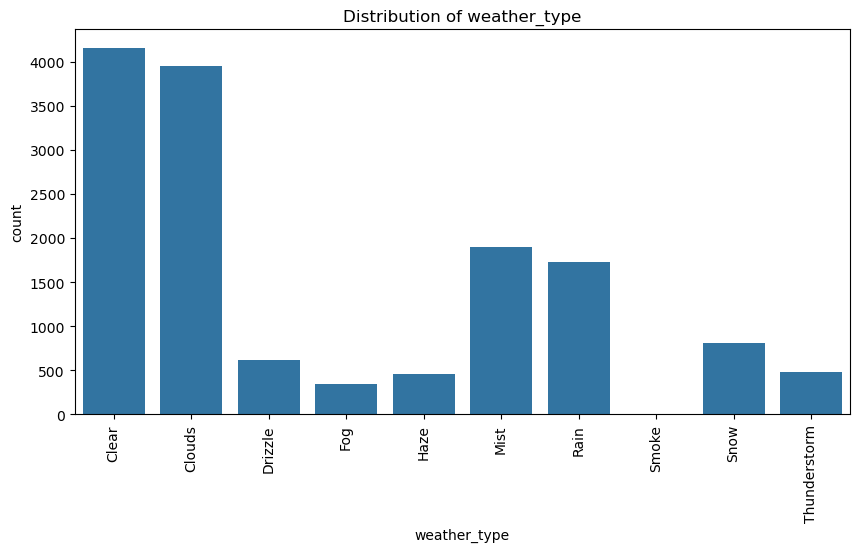

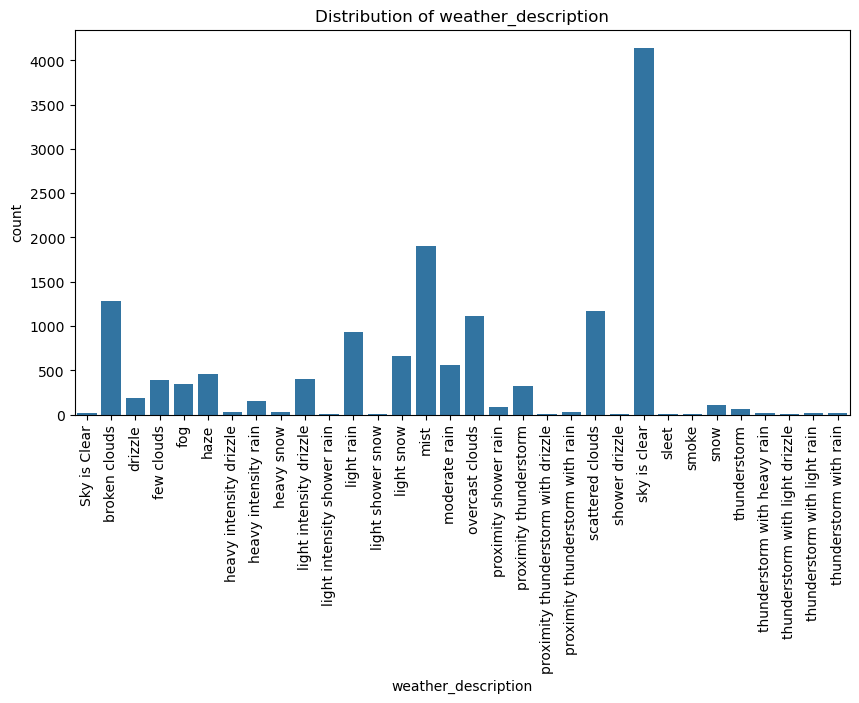

In [13]:
# Plotting the distribution of categorical features of test data
data = df_test.copy()
data['is_holiday'] = data['is_holiday'].astype('category')
data['weather_type'] = data['weather_type'].astype('category')
data['weather_description'] = data['weather_description'].astype('category')

# Plotting the distribution of categorical features
categorical_features = ['is_holiday', 'weather_type', 'weather_description']

for feature in categorical_features:
    plt.figure(figsize=(10, 5))
    sns.countplot(x=data[feature])
    plt.title(f'Distribution of {feature}')
    plt.xticks(rotation=90)
    plt.show()

#### Correlation Analysis

The correlation matrix show the relationships between numerical features. A heatmap provides a visual representation of these correlations, helping to identify features that are strongly correlated with each other or with the target variable.

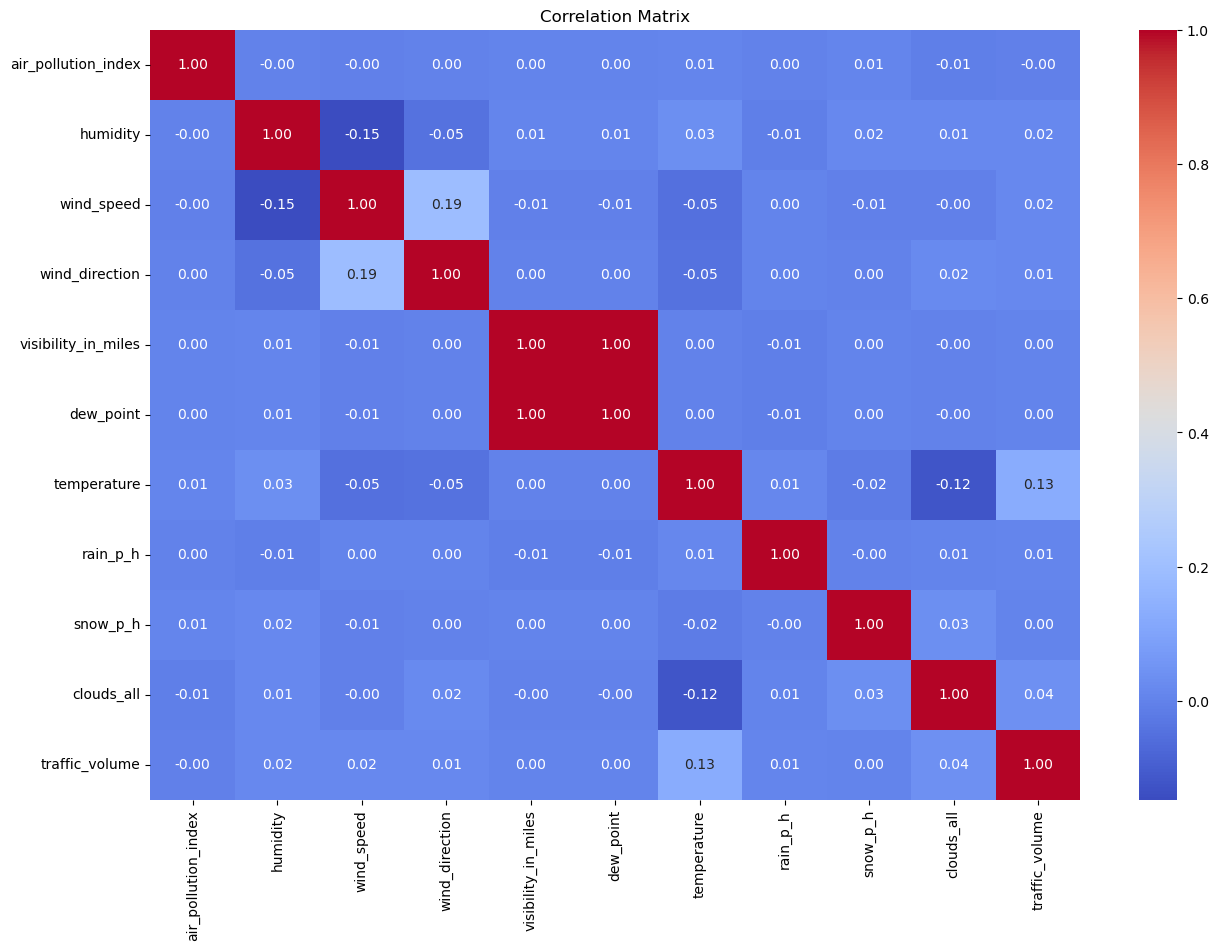

In [14]:
# Compute the correlation matrix for train data 
data = df_train.select_dtypes(include = 'number')

correlation_matrix = data.corr()

# Generate a heatmap to visualize correlations
plt.figure(figsize = (15,10))
sns.heatmap(correlation_matrix,annot = True,fmt = ".2f",cmap = "coolwarm")
plt.title("Correlation Matrix")
plt.show()

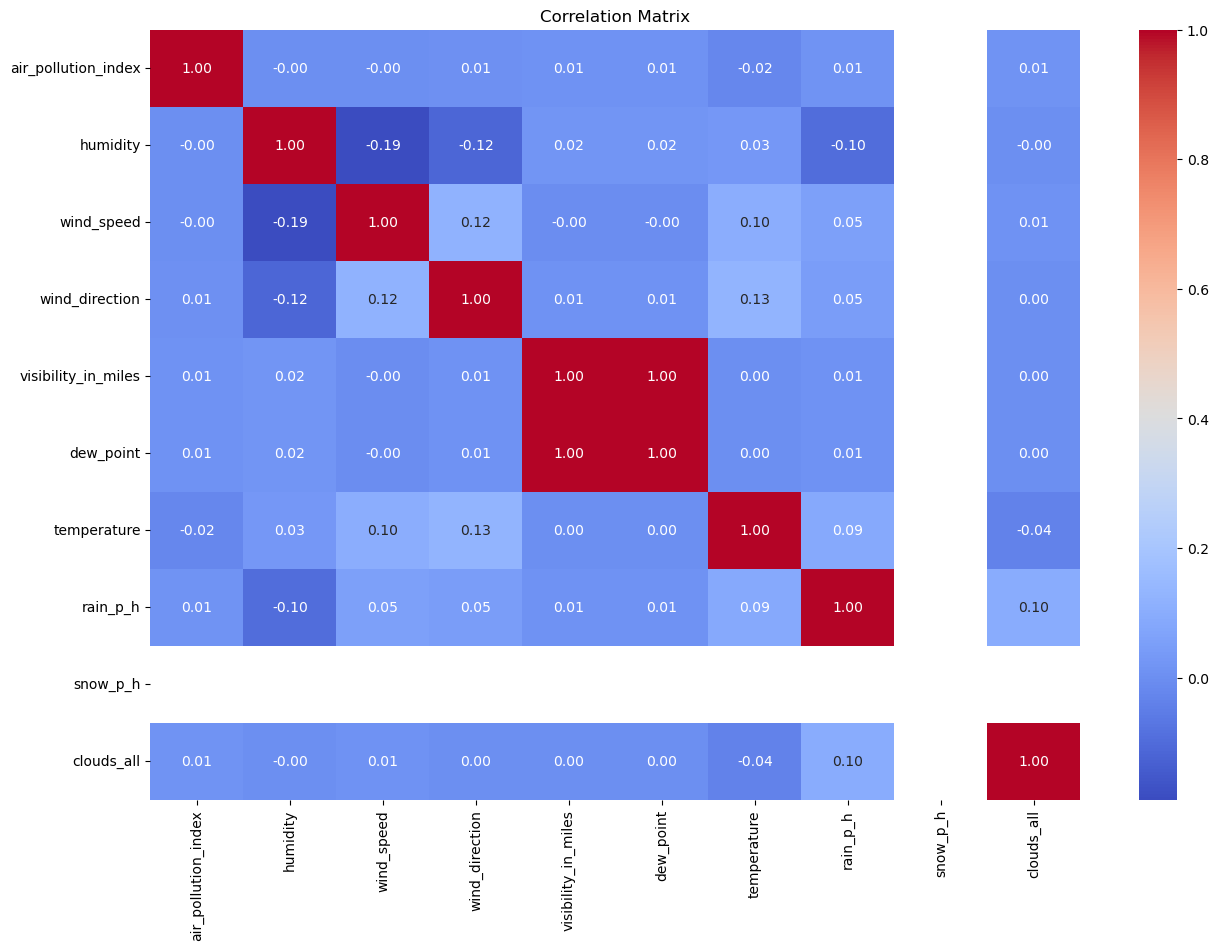

In [15]:
# Compute the correlation matrix for train data 
data = df_test.select_dtypes(include = 'number')

correlation_matrix = data.corr()

# Generate a heatmap to visualize correlations
plt.figure(figsize = (15,10))
sns.heatmap(correlation_matrix,annot = True,fmt = ".2f",cmap = "coolwarm")
plt.title("Correlation Matrix")
plt.show()

#### Scatter Plots for Important Features

Scatter plots help in examining the relationship between individual numerical features and the target variable. This can reveal trends,clusters,or outliers.

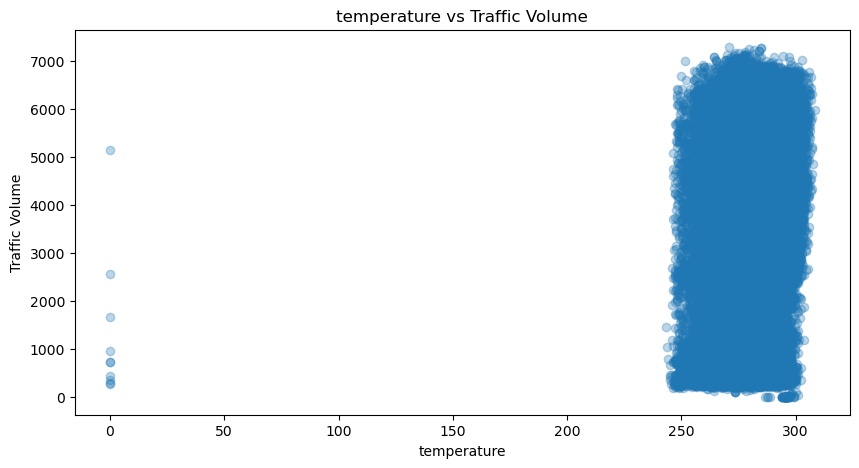

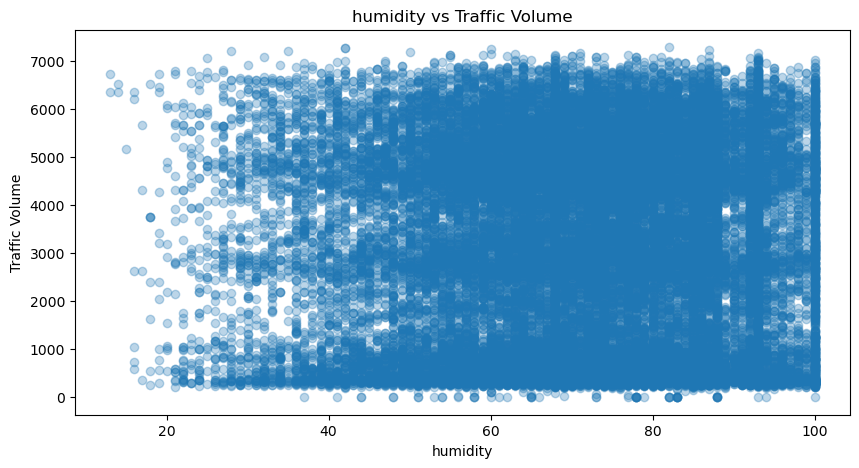

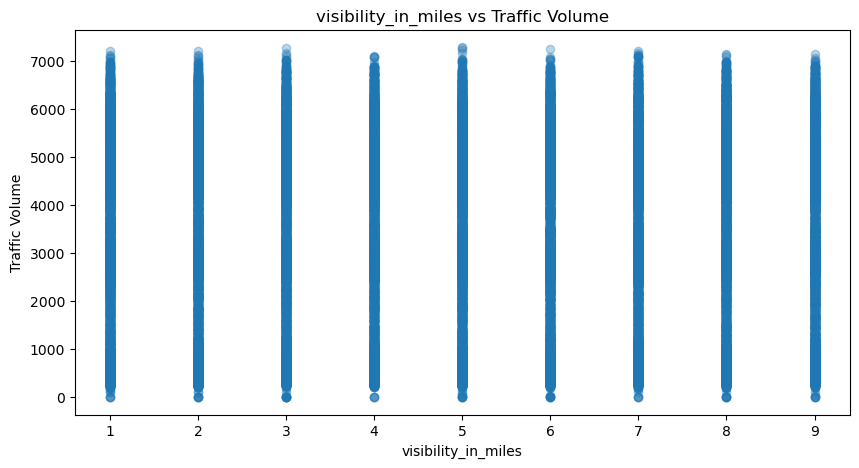

In [16]:
# Scatter plots for selected features against traffic_volume

data = df_train.copy()
important_features = ['temperature', 'humidity', 'visibility_in_miles']

for feature in important_features:
    plt.figure(figsize=(10, 5))
    plt.scatter(data[feature], data['traffic_volume'], alpha=0.3)
    plt.title(f'{feature} vs Traffic Volume')
    plt.xlabel(feature)
    plt.ylabel('Traffic Volume')
    plt.show()

#### Time Series Analysis

Plotting traffic volume over time can help in identifying temporal patterns such as daily,weekly, or seasonal trends. This is important for time series forecasting and modeling.

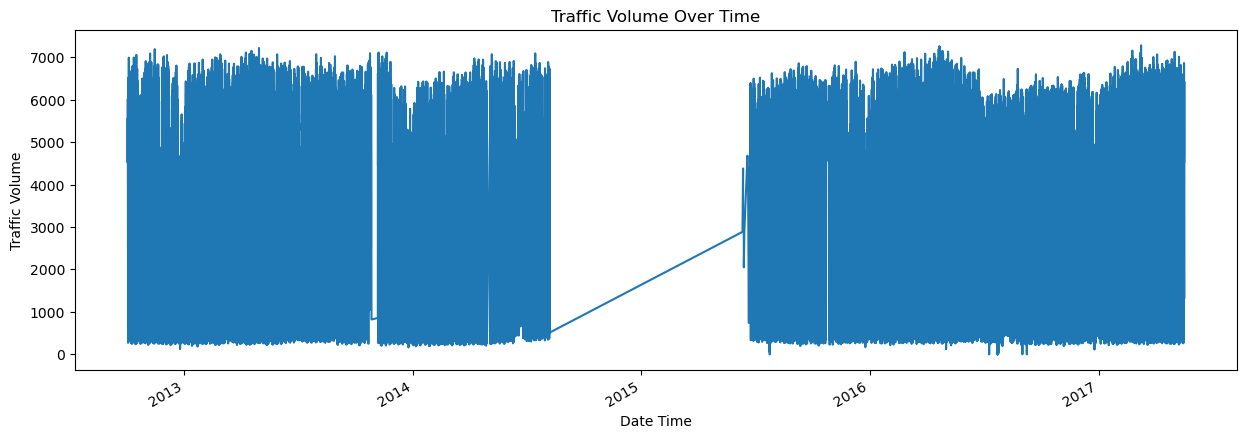

In [17]:
# Time series plot for traffic volume over time 
data = df_train.copy()
data['date_time'] = pd.to_datetime(data['date_time'])
data.set_index('date_time', inplace=True)

plt.figure(figsize=(15, 5))
data['traffic_volume'].plot()
plt.title('Traffic Volume Over Time')
plt.xlabel('Date Time')
plt.ylabel('Traffic Volume')
plt.show()


#### Analyzing the Impact of Holidays on Traffic Volume

This box plot compares traffic volume on holidays versus non-holidays. It helps in understanding if holidays significantly impact traffic, which should be an important feature in the model. 

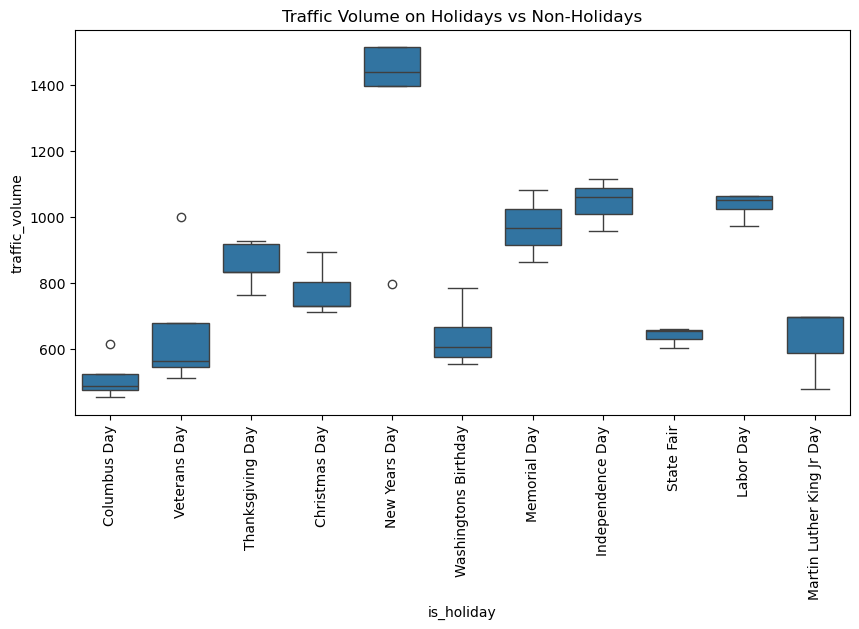

In [18]:
# Box plot to analyze traffic volume during holidays vs non-holidays
data = df_train.copy()
plt.figure(figsize=(10, 5))
sns.boxplot(x='is_holiday', y='traffic_volume', data=data)
plt.title('Traffic Volume on Holidays vs Non-Holidays')
plt.xticks(rotation = 90)
plt.show()

### Data Preprocessing Step

Data preprocessing is a crucial step in building any machine learning model, as it ensures that the data is clean, consistent, and suitable for the algorithms. In this project, several preprocessing techniques were applied to preprate the dataset for training a RandomF orest model to predict traffic volume.

In [19]:
#This function creates a copy of the dataset to ensure that any transformations applied do not affect the original dataset.
def load_data(df):
    return df.copy()

Missing data can lead to inaccurate models. For the is_holiday feature, we assume missing values indicate non-holiday days ('no'). Standardizing non-missing values as 'yes' ensures consistency.

In [20]:
#This function fills missing values in the is_holiday column with 'no' and ensures that any non-'no' values are converted to 'yes'.
def handle_null_values(df):
    data = df.copy()
    data['is_holiday'] = data['is_holiday'].fillna('no').apply(lambda x: 'yes' if x != 'no' else 'no')
    return data

Outliers can distort the results of machine learning models. The IQR method is a simple and effective way to remove extreme values, helping to create a more robust model.

In [21]:
# This function removes outliers using the Interquartile Range (IQR) method for specified columns.
def apply_iqr(df, iqr_columns):
    df_cleaned = df.copy()
    for column_name in iqr_columns:
        Q1 = df[column_name].quantile(0.25)
        Q3 = df[column_name].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_cleaned = df_cleaned[(df_cleaned[column_name] >= lower_bound) & (df_cleaned[column_name] <= upper_bound)]
    return df_cleaned

Unlike IQR, which is based on statistical assumptions, Isolation Forest is a machine learning approach that can identify outliers more effectively in complex data distributions.

In [22]:
# This function uses the Isolation Forest algorithm to identify and remove outliers in specific columns.
def apply_isolation_forest(df, if_columns, contamination=0.01):
    df_cleaned = df.copy()
    for column_name in if_columns:
        iso_forest = IsolationForest(contamination=contamination)
        df_cleaned['outlier'] = iso_forest.fit_predict(df_cleaned[[column_name]])
        df_cleaned = df_cleaned[df_cleaned['outlier'] != -1].drop(columns=['outlier'])
    return df_cleaned

In [23]:
# This function combines the strengths of both IQR and Isolation Forest to clean the dataset from outliers.
# By using both methods, we ensure a more comprehensive approach to outlier detection and removal, reducing noise and improving model accuracy.
def handle_outliers(df, is_train):
    data = df.copy()
    iqr_columns = ['air_pollution_index', 'humidity', 'wind_speed', 'wind_direction',
                   'visibility_in_miles', 'dew_point', 'temperature', 'clouds_all']
    if is_train:
        iqr_columns.append('traffic_volume')
    if_columns = ['rain_p_h', 'snow_p_h']
    df_cleaned_iqr = apply_iqr(data, iqr_columns)
    df_cleaned_isolation = apply_isolation_forest(data, if_columns)
    df_combined = pd.merge(df_cleaned_isolation, df_cleaned_iqr, how='outer')
    return df_combined


Time-related features can have a significant impact on traffic volume. For example, traffic patterns can vary by the time of day or the day of the week, making these features crucial for accurate modeling

In [24]:
# This function extracts additional features from the date_time column, such as year, month, day, hour, and day of the week.
def transform_data(df):
    data = df.copy()
    data['date_time'] = pd.to_datetime(data['date_time'])
    data['year'] = data['date_time'].dt.year
    data['month'] = data['date_time'].dt.month
    data['day'] = data['date_time'].dt.day
    data['hour'] = data['date_time'].dt.hour
    data['day_of_week'] = data['date_time'].dt.dayofweek
    data.drop('date_time', axis=1, inplace=True)
    return data

Machine learning models require numerical inputs. Encoding categorical variables converts them into a format that the model can understand, improving its ability to make accurate predictions.

In [25]:
#  This function encodes categorical variables using one-hot encoding for is_holiday and weather_type, and count encoding for weather_description.
def encode_data(df):
    data = df.copy()
    data = pd.get_dummies(data, columns=['is_holiday', 'weather_type'])
    count_encoding = data['weather_description'].value_counts().to_dict()
    data['weather_description_encoded'] = data['weather_description'].map(count_encoding)
    data.drop('weather_description', axis=1, inplace=True)
    return data

Scaling prevents features with larger ranges from dominating the model's learning process, leading to a more balanced model and improved performance.

In [26]:
# This function normalizes numerical features using Min-Max scaling, ensuring that all features are within the same range.
def scale_data(df, is_train):
    data = df.copy()
    non_numeric_columns = data.select_dtypes(exclude=['number']).columns
    numeric_data = data.drop(columns=non_numeric_columns)
    if is_train:
        target_column = 'traffic_volume'
        features = numeric_data.drop(columns=[target_column])
        scaler = MinMaxScaler()
        scaled_features = scaler.fit_transform(features)
        scaled_df = pd.DataFrame(scaled_features, columns=features.columns)
        scaled_df[target_column] = numeric_data[target_column].values
        scaled_df = pd.concat([scaled_df, data[non_numeric_columns].reset_index(drop=True)], axis=1)
        data = scaled_df.copy()
    else:
        scaler = MinMaxScaler()
        scaled_data = scaler.fit_transform(numeric_data)
        df_scaled = pd.DataFrame(scaled_data, columns=numeric_data.columns, index=numeric_data.index)
        df_scaled = pd.concat([df_scaled, data[non_numeric_columns].reset_index(drop=True)], axis=1)
        data = df_scaled.copy()
    return data

In [27]:
# This function reorders the columns in the dataset, placing the target column (traffic_volume) at the end.
def split_and_merge_training_data(df):
    data = df.copy()
    cols = [col for col in data.columns if col != 'traffic_volume'] + ['traffic_volume']
    data_merged = data[cols]
    return data_merged

Ensuring consistency between the training and test datasets is crucial for the model to perform correctly during prediction. Missing columns in the test data can lead to errors, so this step ensures the test set matches the expected format.

In [28]:
# This function adds any missing columns to the test dataset, ensuring it has the same structure as the training data.
def add_missing_column_to_test_data(df):
    test_data = df.copy()
    test_data['weather_type_Squall'] = False
    columns_order = [
        'air_pollution_index', 'humidity', 'wind_speed', 'wind_direction',
        'visibility_in_miles', 'dew_point', 'temperature', 'rain_p_h',
        'snow_p_h', 'clouds_all', 'year', 'month', 'day', 'hour', 'day_of_week',
        'weather_description_encoded', 'is_holiday_no',
        'is_holiday_yes', 'weather_type_Clear', 'weather_type_Clouds',
        'weather_type_Drizzle', 'weather_type_Fog', 'weather_type_Haze',
        'weather_type_Mist', 'weather_type_Rain', 'weather_type_Smoke',
        'weather_type_Snow', 'weather_type_Squall', 'weather_type_Thunderstorm'
    ]
    test_data = test_data[columns_order]
    return test_data

In [29]:
#  This function combines all the preprocessing steps into a single pipeline that can be applied to both training and test datasets.
def preprocess_data(df, is_train):
    data = load_data(df)
    data_without_null = handle_null_values(data)
    data_without_outliers = handle_outliers(data_without_null, is_train)
    data_transformed = transform_data(data_without_outliers)
    data_encoded = encode_data(data_transformed)
    data_scaled = scale_data(data_encoded, is_train)
    if is_train:
        data = split_and_merge_training_data(data_scaled)
    else:
        data = data_scaled.copy()
        data = add_missing_column_to_test_data(data)
    return data

In [30]:
def load_dataset(file_path):
    return pd.read_csv(file_path)

In [31]:
def process():
    # Specify file paths
    train_file_path = 'Train.csv'  # Path to the training data file
    test_file_path = 'Test.csv'  # Path to the test data file

    # Load the data
    print("Loading data...")
    train_data = load_dataset(train_file_path)
    test_data = load_dataset(test_file_path)

    # Data preprocessing
    print("Preprocessing training data...")
    processed_train_data = preprocess_data(train_data, is_train=True)

    print("Preprocessing test data...")
    processed_test_data = preprocess_data(test_data, is_train=False)

    # Save the processed data
    processed_train_file_path = 'processed_train_data.csv'
    processed_test_file_path = 'processed_test_data.csv'

    print(f"Saving processed training data to: {processed_train_file_path}")
    processed_train_data.to_csv(processed_train_file_path, index=False)

    print(f"Saving processed test data to: {processed_test_file_path}")
    processed_test_data.to_csv(processed_test_file_path, index=False)

    print("Data preprocessing complete.")


In [32]:
process()

Loading data...

Preprocessing training data...

Preprocessing test data...

Saving processed training data to: processed_train_data.csv

Saving processed test data to: processed_test_data.csv

Data preprocessing complete.


### Data Modeling Step
The data modeling step is where the foundation of our predictive model is established. After the data has been preprocessed and is ready for use, we move on to building, training, and evaluating a machine learning model. In this project, we have chosen to use a RandomForestRegressor to predict traffic volume. 

In [33]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import root_mean_squared_error, r2_score, mean_absolute_error

By keeping training and test data in separate files, we ensure that the evaluation of the model’s generalization ability is accurate and unbiased.

In [34]:
# This function loads the processed training (train_data) and test (test_data) datasets from CSV files. The training data will be used to train the model, while the test data will be used to evaluate its performance.
def load_data():
    train_data = pd.read_csv('processed_train_data.csv')  # Load processed training data
    test_data = pd.read_csv('processed_test_data.csv')    # Load processed test data
    return train_data, test_data

The RandomForestRegressor model is chosen for its robustness and resistance to overfitting. Splitting the data using train_test_split allows us to evaluate the model’s performance on unseen data. After training, we use the model to make predictions on the test dataset, which helps assess its generalization ability.

In [35]:
# This function builds, trains, and makes predictions using a RandomForestRegressor model. We load the datasets, separate features (X) and the target variable (y), and then split the data into training and test sets. Finally, we train the model and make predictions on the test dataset.
def build_model():
    train_data, test_data = load_data()  # Load datasets

    # Separate features (X) and target variable (y)
    X = train_data.drop(columns=['traffic_volume'])  # Features
    y = train_data['traffic_volume']  # Target variable

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.34, random_state=42)  # Split data

    # Initialize the RandomForestRegressor model
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)  # Initialize model

    # Perform cross-validation on the training data
    # perform_cross_validation(rf_model, X_train, y_train)

    # Train the model
    print("Training the model...")
    rf_model.fit(X_train, y_train)

    # Make predictions on the test dataset
    test_x = test_data.copy()
    if 'traffic_volume' in test_data.columns:
        test_x = test_x.drop(columns=['traffic_volume'])

    print("Making predictions...")
    test_predictions = rf_model.predict(test_x)

    # Check if the number of predictions matches the number of test samples
    if len(test_predictions) != len(test_data):
        raise ValueError('Number of predictions does not match the number of test samples')

    # Add predictions to the test dataset and save to file
    test_data['prediction'] = test_predictions  # Add predictions to test data
    test_data.to_csv('test_predictions.csv', index=False)  # Save predictions
    print("Predictions added to the test dataset and saved to file.")

    # Display prediction results for both training and test sets
    display_prediction(rf_model, X_train, y_train, X_test, y_test)  # Display results


In [36]:
# This function evaluates the model’s performance on both the training and test datasets. It calculates and displays key metrics such as RMSE, MAE, and R^2 score, which are crucial for understanding the model's accuracy.
def display_prediction(model, X_train, y_train, X_test, y_test):
    # Training data predictions and evaluation
    train_predictions = model.predict(X_train)
    print("-" * 30)
    print("Training RMSE:", root_mean_squared_error(y_train, train_predictions))
    print("Training MAE:", mean_absolute_error(y_train, train_predictions))
    print("Training R^2:", r2_score(y_train, train_predictions))
    print("-" * 30)
    print("")
    print("-" * 30)
    # Test data predictions and evaluation
    test_predictions = model.predict(X_test)
    print("Test RMSE:", root_mean_squared_error(y_test, test_predictions))
    print("Test MAE:", mean_absolute_error(y_test, test_predictions))
    print("Test R^2:", r2_score(y_test, test_predictions))
    print("-" * 30)


In [37]:
build_model()

Training the model...

Making predictions...

Predictions added to the test dataset and saved to file.

------------------------------

Training RMSE: 156.9871222114294

Training MAE: 87.3967127592709

Training R^2: 0.9938005055167146

------------------------------



------------------------------

Test RMSE: 408.1608863988346

Test MAE: 229.6416540305011

Test R^2: 0.9577940054747414

------------------------------
